6та лабораториска вежба по предметот Податочно рударство

Изработиле: Јана Митровска (181080) и Бојан Петрушевски (162012)

Тема: Logistic regression, LDA, Ensamble


# **Reading the dataset**

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from operator import sub
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate, GridSearchCV, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, LogisticRegression

In [3]:
data = pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


In [5]:
data_encoded = data.apply(LabelEncoder().fit_transform)

In [6]:
X = data_encoded.drop(['type'], axis = 1)
Y = data_encoded.type.values

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# **Logistic Regression**

In [8]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1044
           1       0.98      1.00      0.99       514

    accuracy                           0.99      1558
   macro avg       0.99      1.00      0.99      1558
weighted avg       0.99      0.99      0.99      1558



Text(0.5, 257.44, 'Predicted label')

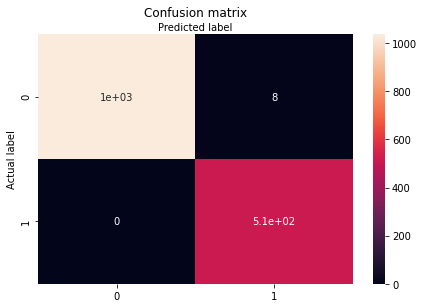

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True )
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel("Actual label")
plt.xlabel('Predicted label')

(array([4.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 7.000e+00, 5.000e+00,
        6.000e+00, 8.000e+00, 1.500e+01, 1.505e+03]),
 array([0.54417721, 0.58975949, 0.63534177, 0.68092404, 0.72650632,
        0.7720886 , 0.81767088, 0.86325316, 0.90883544, 0.95441772,
        1.        ]),
 <a list of 10 Patch objects>)

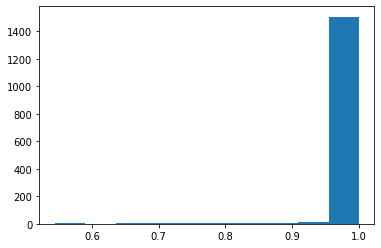

In [ ]:
y_pred_proba = model.predict_proba(X_test)
plt.hist([max(x) for x in y_pred_proba])

In [ ]:
y_pred_proba

array([[9.99976811e-01, 2.31885670e-05],
       [1.06798808e-02, 9.89320119e-01],
       [9.99999854e-01, 1.46086734e-07],
       ...,
       [2.80711529e-03, 9.97192885e-01],
       [9.99999839e-01, 1.61261931e-07],
       [9.99999935e-01, 6.54300926e-08]])

# **LDA**

In [9]:
X = data_encoded.drop(['type'], axis = 1)
Y = data.type.values
target_names = data.type

explained variance ratio : [0.39744421 0.23764821]


Text(0.5, 1.0, 'LDA of Netflix dataset')

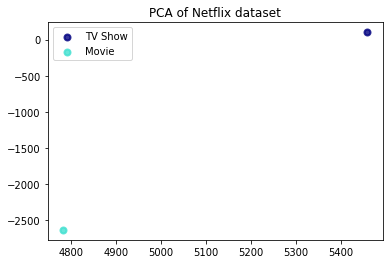

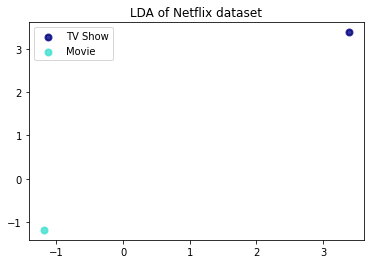

In [10]:
pca = PCA(n_components = 2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, Y).transform(X)

print('explained variance ratio : %s' %str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0,1], target_names):
  plt.scatter(X_r[i, 0], 
              X_r[i, 1], 
              color = color, 
              alpha=0.8, lw=lw,
              label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Netflix dataset')

plt.figure()
for color, i, target_name in zip(colors, [0,1], target_names):
  plt.scatter(X_r2[i], 
              X_r2[i], 
              color = color, 
              alpha=0.8, lw=lw,
              label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Netflix dataset')


# **Ensemble methods**

In [ ]:
log_reg = LogisticRegression()
des_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

log_reg.fit(X_train, Y_train)
des_tree.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

log_reg_pred = log_reg.predict(X_test)
des_tree_pred = des_tree.predict(X_test)
knn_pred = knn.predict(X_test)

averaged_preds = (log_reg_pred + des_tree_pred + knn_pred)
acc = accuracy_score(Y_test, averaged_preds)
print(acc)

0.5924261874197689


In [ ]:
voting_clf = VotingClassifier(estimators=[('KNN', knn), ('Decision Tree', des_tree), ('Logistic Regression', log_reg)], voting = 'hard')
voting_clf.fit(X_train, Y_train)
preds = voting_clf.predict(X_test)
acc = accuracy_score(Y_test, preds)
f1 = f1_score(Y_test, preds, average="macro")

print("Accuarcy is: " + str(acc))
print("F1 score is: " + str(f1))

Accuarcy is: 0.9987163029525032
F1 score is: 0.9984892472805481


In [ ]:
log_reg_bagging_model = BaggingClassifier(base_estimator=log_reg, n_estimators=5)
des_tree_bagging_model = BaggingClassifier(base_estimator=des_tree, n_estimators=5)
random_forest = RandomForestClassifier(n_estimators=10)
extra_trees = ExtraTreesClassifier(n_estimators=10)

def bagging_ensemble(model):
  k_folds = KFold(n_splits=20)
  results = cross_val_score(model, X_train, Y_train, cv=k_folds)
  print(results.mean())

bagging_ensemble(log_reg_bagging_model)
bagging_ensemble(des_tree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.99791151372743
0.9975910009069174
0.9987143416604832
0.997430744496661


In [ ]:
k_fold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=10)
results = cross_val_score(model, X_test, Y_test, cv=k_fold)
print(results.mean())

0.9993589743589745
